<h3> More Indepth Random Forest with Larger Dataset </h3>

Banknote Authentication Dataset that has features of Image scan done on set of bills to find fake bills.

The features out of image scan ( wavelet transformation ) are :

* Variance of wavelet

* Skewness of wavelet

* Curtosis of wavelet
    
* Image entropy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Datasets/data_banknote_authentication.csv')

In [2]:
data.sample(10)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
715,3.49160,8.5709,-3.03260,-0.59182,0
587,1.42760,8.3847,-2.09950,-1.96770,0
257,2.20340,5.9947,0.53009,0.84998,0
592,0.95626,2.4728,4.45780,0.21636,0
863,0.20216,1.9182,-3.28280,-0.61768,1
971,0.00312,-4.0061,1.79560,0.91722,1
593,-2.79140,1.7734,6.77560,-0.39915,0
644,3.03330,-2.5928,2.31830,0.30300,0
486,3.88320,6.4023,-2.43200,-0.98363,0
512,2.66480,10.7540,-3.39940,-4.16850,0


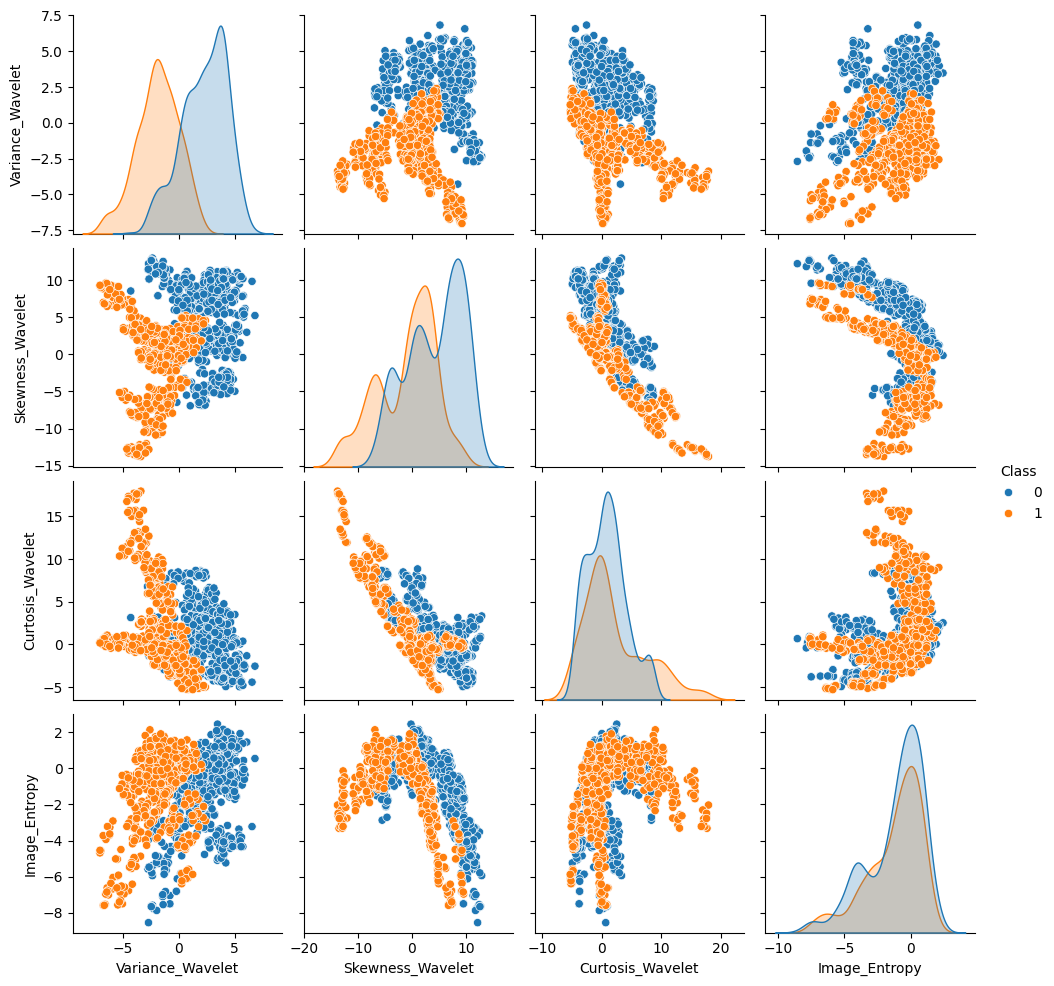

In [3]:
sns.pairplot(data , hue='Class')
# below plots shows how clearly seprated data is..

In [4]:
X = data.drop('Class' , axis=1)
y = data['Class']

In [5]:
from sklearn.model_selection import train_test_split

X_train , X_test,  y_train , y_test = train_test_split(X , y , test_size=0.15 , random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings

params_grid = {
    'n_estimators':[100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 , 900 , 1000],
    'max_features':['sqrt' , 'log2'],
    'bootstrap':[True , False] ,
    'oob_score':[True , False]
}

warnings.filterwarnings('ignore' , "Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.")

Model = GridSearchCV(estimator=RandomForestClassifier() , param_grid=params_grid)
Model.fit(X_train , y_train)

c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mohit\App

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000],
                         'oob_score': [True, False]})

In [7]:
Model.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'oob_score': True}

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       1.00      0.99      0.99        95

    accuracy                           1.00       206
   macro avg       1.00      0.99      1.00       206
weighted avg       1.00      1.00      1.00       206



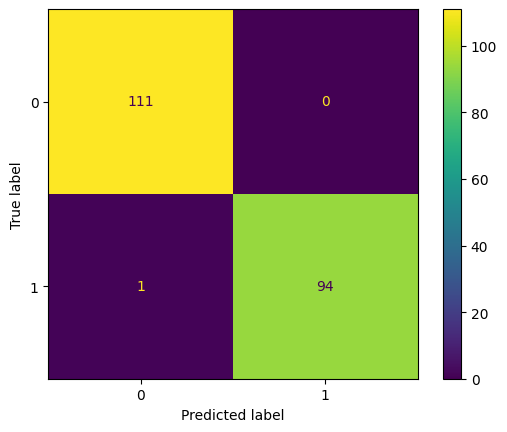

In [9]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , confusion_matrix
pred = Model.predict(X_test)

print("Classification Report : \n" , classification_report(y_test , pred))

matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , pred), display_labels=Model.classes_)
matrix.plot()
plt.show()